In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from numpy.linalg import svd


In [65]:

#Step1: Loading the image 
img = img.imread('test.jpg') 
img=img[:,:,1]
max_feature=len(img[0])
img2=np.array(img)
print("feature or dimension: "+str(max_feature))
print("row : "+str(len(img)))
print(img)


feature or dimension: 576
row : 864
[[184 185 185 ... 172 172 172]
 [185 185 185 ... 172 172 173]
 [185 185 185 ... 172 171 172]
 ...
 [255 255 255 ... 199 198 197]
 [255 255 255 ... 196 198 196]
 [255 255 255 ... 196 197 196]]


In [67]:
def MyPca(feature,data,show=False):
    # step 2 standardisation
    r=len(data)
    c=len(data[0])
    sum=[]
    
    for j in range(0,c):
        sum.append(0)
    
    for i in range(0,r):
        for j in range(0,c):
            sum[j]+=data[i][j]
    
    for i in range(0,r):
        for j in range(0,c):
            data[i][j]-=sum[j]/r
    
    
    # step 3 covariance
    covar=mul(data.T,data)
    if show:
        print("Covariance:")
        print(covar.shape)
        print(covar)
    # step 4 egin values and eigen vector
    U,S,V=svd(covar)
    
    # step 5 featur selection
    Ured=U[:,:feature]

    if show:
       print("Eigen vectors ")
       print(Ured,end="\n\n") 
       print("Eigen values ")
       print(S[:feature],end="\n\n") 
    
    # step 6 projection
#     z=np.dot(data,Ured)
    z=mul(data,Ured)
#     print(mul(data,Ured))
    return z
    

In [68]:
n=int(input("enter number of dimension"))
while n>max_feature:
    print("please enter dimension less then original dimension i.e "+str(max_feature))
    n=int(input())


new_dataset=MyPca(n,img2,show=True)  


enter number of dimension3
Covariance:
(576, 576)
[[ 61  45  61 ... 189 111 239]
 [ 45 109 112 ... 188  38  88]
 [ 61 112 155 ... 148 166 125]
 ...
 [189 188 148 ...  93 229 185]
 [111  38 166 ... 229 229 179]
 [239  88 125 ... 185 179  13]]
Eigen vectors 
[[-0.04221077  0.03062168  0.04922971]
 [-0.04113353  0.03890345  0.03117774]
 [-0.04068449 -0.05022694  0.01618348]
 ...
 [-0.04252145  0.04083171 -0.05224449]
 [-0.04258109 -0.02239655  0.01941687]
 [-0.04223961 -0.01677298 -0.06065998]]

Eigen values 
[73530.16641729  3528.05690367  3504.91879488]



In [69]:
print("new dataset")
print(new_dataset)

new dataset
[[-2081.88752309    54.387501      47.17110577]
 [-2078.50898573    54.0143706     47.16871384]
 [-2075.16633091    53.23475606    47.77654857]
 ...
 [-3623.348531      40.22309973    21.67819149]
 [-3626.56735038    38.80081837    20.08837166]
 [-3610.49837827    25.74738992    37.10309523]]


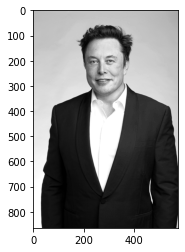

In [61]:
plt.imshow(img,cmap="gray")


max dimension : 576


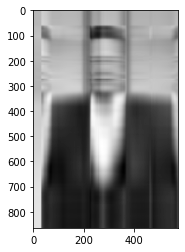

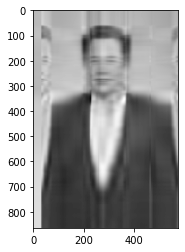

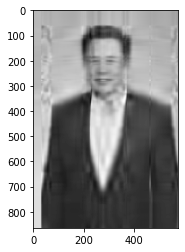

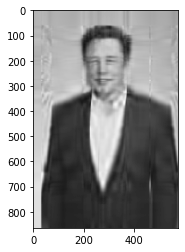

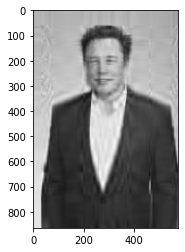

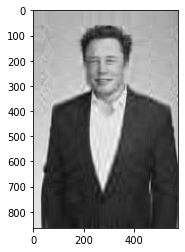

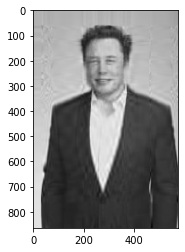

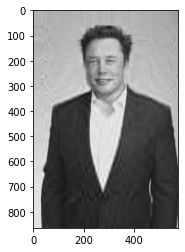

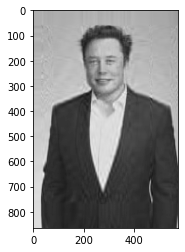

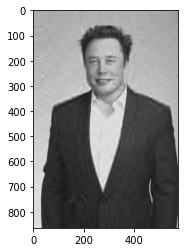

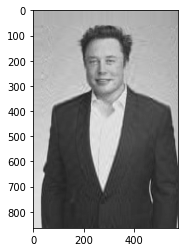

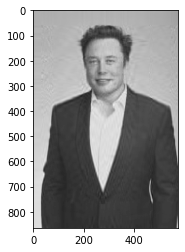

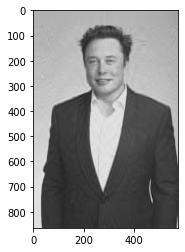

In [70]:
print("max dimension : "+str(max_feature))
for i in range(3,42,3):
    img3 = MyPCA(i,img,show=False)
    plt.figure()
    plt.imshow(img3,cmap="gray")